In [17]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K

### Loading CSV Files

In [18]:
df_train = pd.read_csv('Data/Validation plus Testing Data/2ndLevelTrain.csv',header=None)
# df_test = pd.read_csv('2ndLevelTest.csv',header=None)

In [19]:
print(df_train.shape)

(5702, 4)


### Dropping first 2 Rows since it is unnecessary

In [20]:
df_train.drop(index=df_train.index[0], axis=0, inplace=True)
# df_test.drop(index=df_test.index[0], axis=0, inplace=True)
df_train.drop(index=df_train.index[0], axis=0, inplace=True)
# df_test.drop(index=df_test.index[0], axis=0, inplace=True)


In [21]:
print(df_train.shape)

(5700, 4)


### Duplicating data for each module and for label

In [22]:
dflabels_train = df_train
# dflabels_test = df_test

### Dropping Columns to get data for specific module

In [23]:
df_train = df_train.drop(3,axis = 1)
dflabels_train = dflabels_train.drop(dflabels_train.iloc[:,0:3],axis = 1)

# df_test = df_test.drop(3,axis = 1)
# dflabels_test = dflabels_test.drop(dflabels_test.iloc[:,0:3],axis = 1)

In [24]:
df_train = df_train.to_numpy()
dflabels_train = dflabels_train.to_numpy()

# df_test = df_test.to_numpy()
# dflabels_test = dflabels_test.to_numpy()

In [25]:
print(df_train.shape)
print(dflabels_train.shape)

(5700, 3)
(5700, 1)


In [26]:
input_shape = 3
num_classes = 2

In [27]:
LABELS = ['Awake','Drowsy']

In [28]:
df_train = df_train.astype('float32')
dflabels_train = dflabels_train.astype('float32')

In [29]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [30]:
model = keras.models.load_model("best_model(2ndlevelv1).h5")

test_loss, test_acc = model.evaluate(df_train, dflabels_train,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

179/179 [==============================] - 0s 595us/step - loss: 0.5024 - sparse_categorical_accuracy: 0.7851
Test accuracy 0.7850877046585083
Test loss 0.5024054050445557


In [31]:
dftrainlabels_hot = np_utils.to_categorical(dflabels_train, 2)
# Print confusion matrix for training data
y_pred_train = model.predict(df_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
max_y_train = np.argmax(dftrainlabels_hot, axis=1)


179/179 [==============================] - 0s 486us/step


In [32]:
print(max_y_train)
print(max_y_pred_train)

[0 1 0 ... 1 0 1]
[0 1 0 ... 1 0 0]


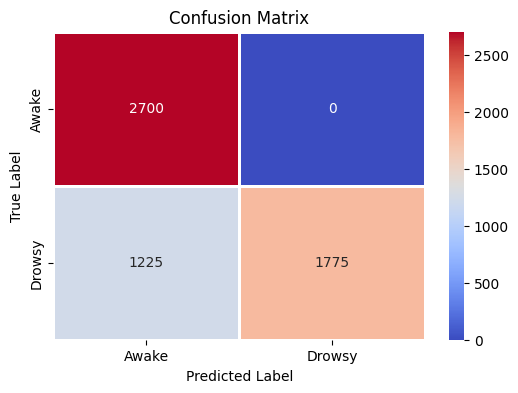

In [33]:

show_confusion_matrix(max_y_train, max_y_pred_train)
# show_confusion_matrix(dflabels_train, max_y_pred_train)

### Building the Model

In [ ]:
model = Sequential()
model.add(Dense(1,input_shape=(input_shape,), activation='sigmoid'))
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 25
batch_size = 50

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model(2ndlevel).h5", save_best_only=True, monitor="val_loss"
    ),
    # keras.callbacks.ReduceLROnPlateau(
    #     monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    # ),
    # keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    df_train,
    dflabels_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


# Print confusion matrix for training data
y_pred_train = model.predict(df_train)

In [ ]:
new_y_pred_train = np.rint(y_pred_train)
print(new_y_pred_train)  

print(classification_report(dflabels_train, new_y_pred_train))

### Checking agains Testing Data

In [ ]:
dftest = df_test.astype('float32')
dftestlabels = dflabels_test.astype('float32')

dftestlabels_hot = np_utils.to_categorical(dftestlabels, num_classes)


In [ ]:
LABELS = ['Awake','Drowsy']

In [ ]:
model = keras.models.load_model("best_model(2ndlevel).h5")

test_loss, test_acc = model.evaluate(dftest, dftestlabels,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(dftest)
# Take the class with the highest probability from the test predictions

new_y_pred_test = np.rint(y_pred_test)
print(new_y_pred_test)  

max_y_test = np.argmax(dftestlabels_hot, axis=1)

show_confusion_matrix(max_y_test, new_y_pred_test)

print(classification_report(max_y_test, new_y_pred_test))